### Questão 3:
Resolver 10 problemas de otimização multivariável sem restrições, obtidos do site [Test functions for optimization](https://en.wikipedia.org/wiki/Test_functions_for_optimization) ou de outras fontes (dadas as referências), usando 5 métodos de otimização e compará-los usando as 4 métricas de desempenho.


In [1]:
import time
import numpy as np
from pprint import pprint
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
# F1 = Rastrigin Function
def F1(X):
    x, y = X
    A = 10
    return A*2 + (x**2 - A * np.cos(2 * np.pi * x)) + (y**2 - A * np.cos(2 * np.pi * y))

# F2 = Ackley Function
def F2(X):
    x, y = X
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20

# F3 = Sphere Function
def F3(X):
    x, y = X
    return x**2 + y**2

# F4 = Rosenbrock Function
def F4(X):
    x, y = X
    return 100 * (y - x**2)**2 + (1 - x)**2

# F5 = Beale Function
def F5(X):
    x, y = X
    return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

# F6 = Goldstein–Price Function
def F6(X):
    x, y = X
    return (1 + (x + y + 1)**2 * (19 - 14*x + 3*x**2 - 14*y + 6*x*y + 3*y**2)) * (30 + (2*x - 3*y)**2 * (18 - 32*x + 12*x**2 + 48*y - 36*x*y + 27*y**2))

# F7 = Booth Function
def F7(X):
    x, y = X
    return (x + 2*y - 7)**2 + (2*x + y - 5)**2

# F8 = Bukin Function N.6
def F8(X):
    x, y = X
    return 100 * np.sqrt(abs(y - 0.01*x**2)) + 0.01 * abs(x + 10)

# F9 = Matyas Function
def F9(X):
    x, y = X
    return 0.26 * (x**2 + y**2) - 0.48 * x * y

# F10 = Easom Function
def F10(X):
    x, y = X
    return -np.cos(x) * np.cos(y) * np.exp(-((x - np.pi)**2 + (y - np.pi)**2))

# Global Minimum
global_minimum = {
    # Rastrigin Function
    "F1": {
        "x": [0, 0],
        "Sx": 0
    },
    # Ackley Function
    "F2": {
        "x": [0, 0],
        "Sx": 0,
    },
    # Sphere Function
    "F3": {
        "x": [0, 0],
        "Sx": 0
    },
    # Rosenbrock Function
    "F4": {
        "x": [1, 1],
        "Sx": 0
    },
    # Beale Function
    "F5": {
        "x": [3, 0.5],
        "Sx": 0
    },
    # Goldstein–Price Function
    "F6": {
        "x": [0, -1],
        "Sx": 3
    },
    # Booth Function
    "F7": {
        "x": [1, 3],
        "Sx": 0
    },
    # Bukin Function N.6
    "F8": {
        "x": [-10, 1],
        "Sx": 0
    },
    # Matyas Function
    "F9": {
        "x": [0, 0],
        "Sx": 0
    },
    # Easom Function
    "F10": {
        "x": [np.pi, np.pi],
        "Sx": -1
    },
}

In [3]:
# Decorator to calculate execution time
def execution_time_decorator(func):
    def wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        execution_time = (end_time - start_time) * 1000  # milliseconds
        execution_time = round(execution_time, 4)
        return result, execution_time
    return wrapper

@execution_time_decorator
def execute_minimize(obj_function, method, x_init):
    result = minimize(obj_function, x_init, method=method)
    return result

# List of optimization methods
methods = ['nelder-mead', 'BFGS', 'CG', 'Powell', 'L-BFGS-B']

# List of test functions
functions = [F1, F2, F3, F4, F5, F6, F7, F8, F9, F10]

# Initial guess
X0 = [100, 100]

# Store results for each method and function
results = {method: {} for method in methods}

# Run each method on each function
for method in methods:
    for i, func in enumerate(functions, start=1):
        R, T = execute_minimize(func, method, X0)
        results[method][f'F{i}'] = {
            'iterations': R.nit,
            'function_evaluations': R.nfev,
            'execution_time_ms': T,
            'x': R.x,
            'Sx': R.fun,
            'success': R.success
        }

In [4]:
# Open a file in write mode
with open("resposta3_results.log", "w") as log_file:
    # Use pprint to write the formatted dictionary to the file
    pprint(results, stream=log_file)

In [5]:
# Define tolerances
epsilon_x = 1e-8  # Tolerance for independent variable (adjust as needed)
epsilon_s = 1e-8  # Tolerance for objective function (adjust as needed)

# Initialize metrics
N = len(functions)
theta = {}
chi = {}
eta = {}
xi = {}

# Store the minimum values of T*, S*, and d* for each function
min_T_star = {}
min_S_star = {}
min_d_star = {}

for j in range(1, N + 1):
    func_id = f'F{j}'

    # Calculate the minimum value for each metric across all methods
    min_T_star[func_id] = min([results[m][func_id]['execution_time_ms'] for m in methods])
    min_S_star[func_id] = min([results[m][func_id]['function_evaluations'] for m in methods])

    # Initialize min_d_star to a very large value
    min_d_star[func_id] = float('inf')

    # Loop to calculate d* (the best quality of solution)
    for m in methods:
        x_m_j = np.array(results[m][func_id]['x'])
        x_star_j = np.array(global_minimum[func_id]['x'])
        S_x_m_j = results[m][func_id]['Sx']
        S_x_star_j = global_minimum[func_id]['Sx']

        d_m_j = (np.linalg.norm(x_m_j - x_star_j) / epsilon_x) + (abs(S_x_m_j - S_x_star_j) / epsilon_s)

        # Update min_d_star if a lower d_m_j is found
        if d_m_j < min_d_star[func_id]:
            min_d_star[func_id] = d_m_j

# Compute the metrics
for method in methods:
    theta_sum = 0
    chi_sum = 0
    xi_sum = 0
    success_count = 0

    for j in range(1, N + 1):
        func_id = f'F{j}'

        # Current method's values
        T_ij = results[method][func_id]['execution_time_ms']
        S_ij = results[method][func_id]['function_evaluations']

        # Calculate d_ij using the provided formula
        x_i_j = np.array(results[method][func_id]['x'])
        x_star_j = np.array(global_minimum[func_id]['x'])
        S_x_i_j = results[method][func_id]['Sx']
        S_x_star_j = global_minimum[func_id]['Sx']

        d_ij = (np.linalg.norm(x_i_j - x_star_j) /
                epsilon_x) + (abs(S_x_i_j - S_x_star_j) / epsilon_s)

        # Avoid division by zero
        if d_ij == 0:
            d_ij = 1E-10

        # Open a file in append mode (so you can add multiple logs)
        with open("resposta3_debug.log", "a") as log_file:
            # Write the formatted debug information to the file
            log_file.write(
                f"Method: {method}, Function: {func_id}, d_ij: {d_ij}, min_d_star: {min_d_star[func_id]}\n"
            )

        # Calculate the sums for each metric
        theta_sum += min_T_star[func_id] / T_ij
        chi_sum += min_S_star[func_id] / S_ij
        xi_sum += min_d_star[func_id] / d_ij

        # Count successful optimizations
        if results[method][func_id]['success']:
            success_count += 1

    # Final metric values for the method
    theta[method] = (100 / N) * theta_sum
    chi[method] = (100 / N) * chi_sum
    eta[method] = (100 * success_count) / N
    xi[method] = (100 / N) * xi_sum

# Display the metrics
print("\nEfficacy (θ):")
print(theta)
print("\nEfficiency (χ):")
print(chi)
print("\nRobustness (η):")
print(eta)
print("\nQuality (ξ):")
print(xi)


Efficacy (θ):
{'nelder-mead': 46.08705492609058, 'BFGS': 44.858737904956115, 'CG': 42.587215827596374, 'Powell': 76.33901657807219, 'L-BFGS-B': 63.85709695172118}

Efficiency (χ):
{'nelder-mead': 21.02785747197551, 'BFGS': 69.34863790556395, 'CG': 65.47989855018399, 'Powell': 56.909290220324706, 'L-BFGS-B': 77.74765598230695}

Robustness (η):
{'nelder-mead': 80.0, 'BFGS': 70.0, 'CG': 70.0, 'Powell': 100.0, 'L-BFGS-B': 90.0}

Quality (ξ):
{'nelder-mead': np.float64(30.00173889120184), 'BFGS': np.float64(26.719629671202775), 'CG': np.float64(26.439021946633932), 'Powell': np.float64(60.043967651941294), 'L-BFGS-B': np.float64(40.05891305383345)}


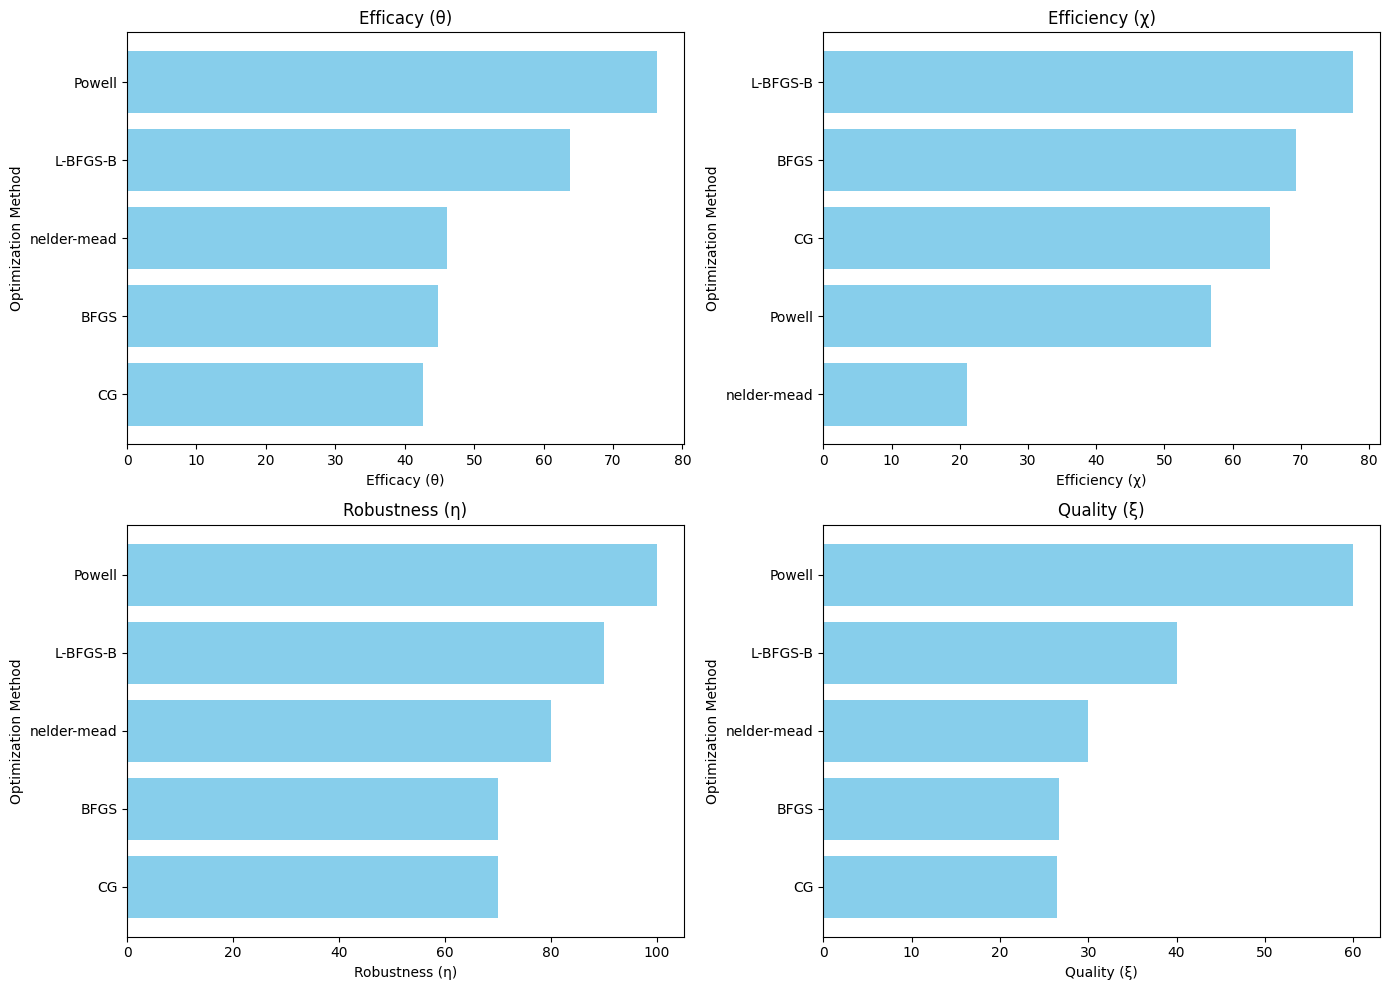

In [6]:
import matplotlib.pyplot as plt

# Sort metrics from best to worst
sorted_theta = sorted(theta.items(), key=lambda x: x[1], reverse=True)
sorted_chi = sorted(chi.items(), key=lambda x: x[1], reverse=True)
sorted_eta = sorted(eta.items(), key=lambda x: x[1], reverse=True)
sorted_xi = sorted(xi.items(), key=lambda x: x[1], reverse=True)

# Function to plot a metric
def plot_metric(ax, sorted_metric, metric_name):
    methods = [item[0] for item in sorted_metric]
    values = [item[1] for item in sorted_metric]

    ax.barh(methods, values, color='skyblue')
    ax.set_xlabel(metric_name)
    ax.set_ylabel('Optimization Method')
    ax.set_title(f'{metric_name}')
    ax.invert_yaxis()  # Invert y-axis to have the best method at the top

# Create a figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot each metric in a subplot
plot_metric(axs[0, 0], sorted_theta, 'Efficacy (θ)')
plot_metric(axs[0, 1], sorted_chi, 'Efficiency (χ)')
plot_metric(axs[1, 0], sorted_eta, 'Robustness (η)')
plot_metric(axs[1, 1], sorted_xi, 'Quality (ξ)')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

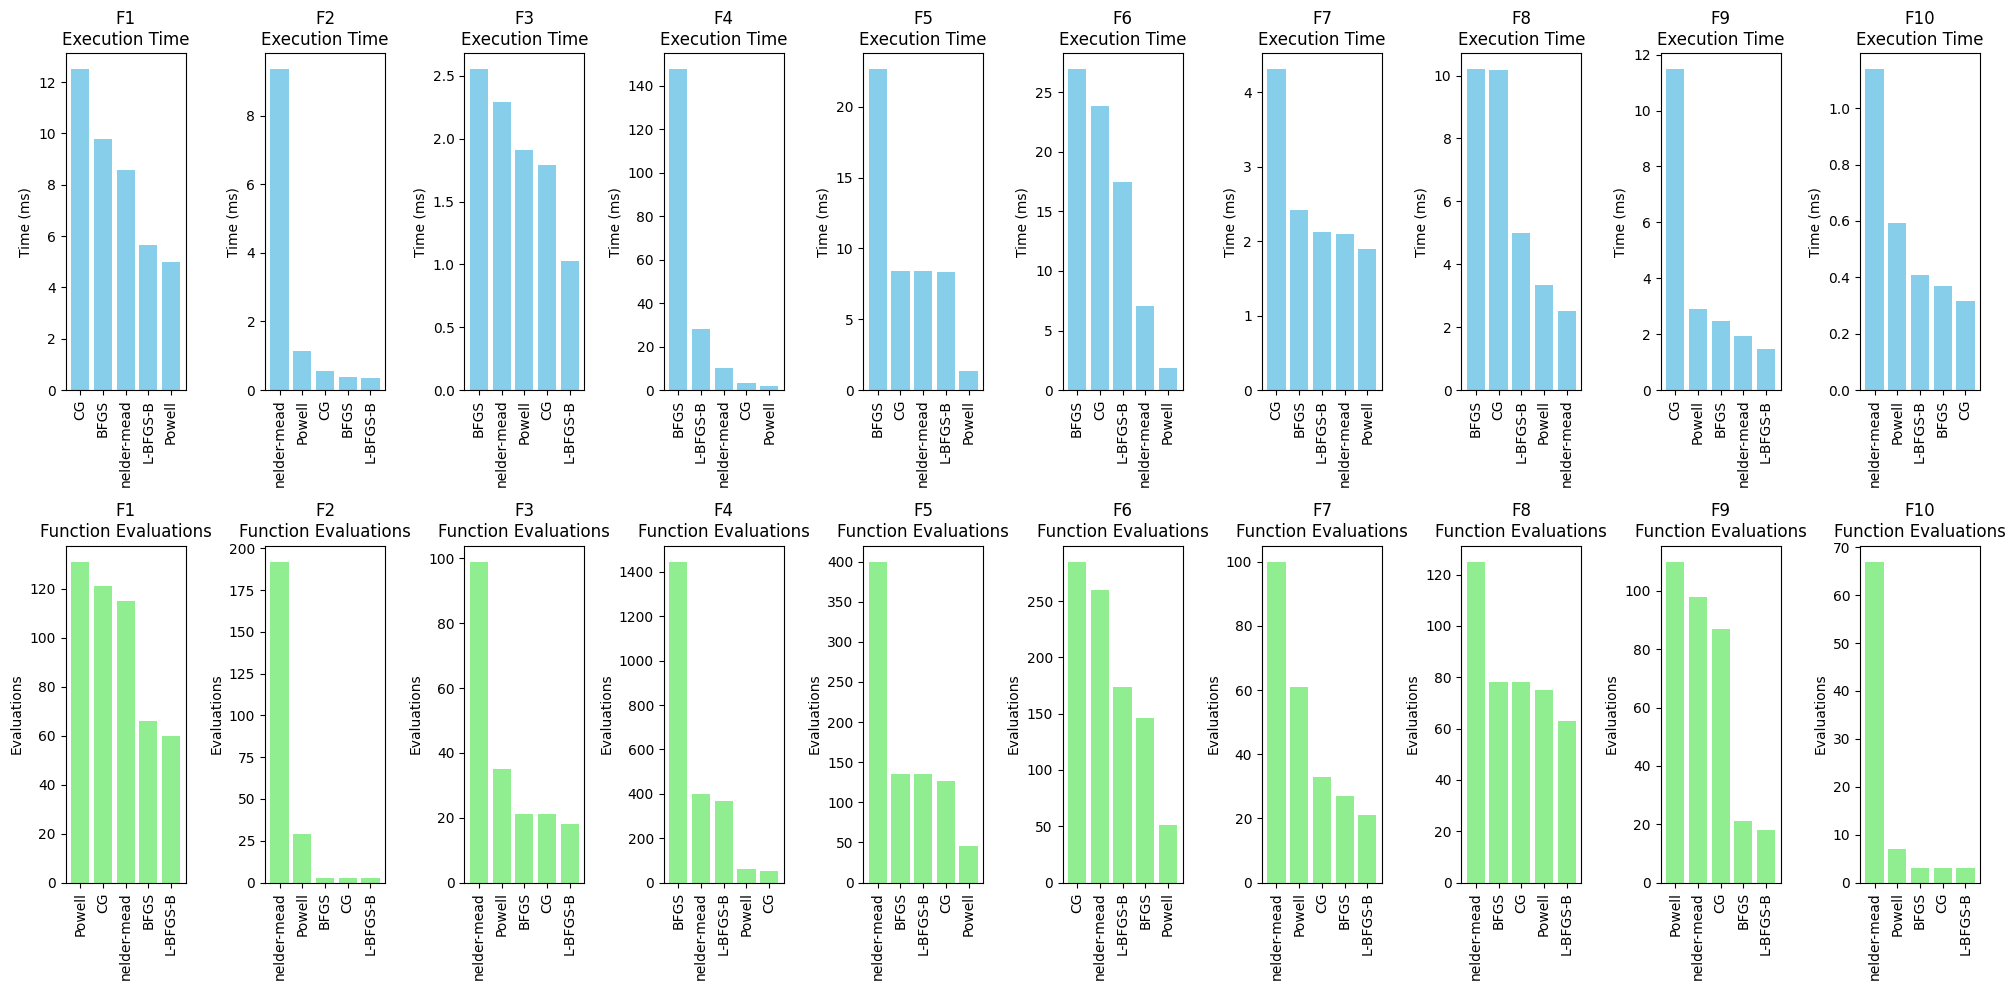

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize the figure and axes
fig, axs = plt.subplots(2, len(functions), figsize=(20, 10))

functions = [f'F{i}' for i in range(1, 11)]
methods = list(results.keys())

# 1. Execution Time per Method and Function (Sorted)
for i, func in enumerate(functions):
    times = [(method, results[method][func]['execution_time_ms']) for method in methods]
    times_sorted = sorted(times, key=lambda x: x[1], reverse=True)

    sorted_methods, sorted_times = zip(*times_sorted)

    axs[0, i].bar(sorted_methods, sorted_times, color='skyblue')
    axs[0, i].set_title(f'{func}\nExecution Time')
    axs[0, i].set_ylabel('Time (ms)')
    axs[0, i].tick_params(axis='x', rotation=90)

# 2. Function Evaluations per Method and Function (Sorted)
for i, func in enumerate(functions):
    evaluations = [(method, results[method][func]['function_evaluations']) for method in methods]
    evaluations_sorted = sorted(evaluations, key=lambda x: x[1], reverse=True)

    sorted_methods, sorted_evaluations = zip(*evaluations_sorted)

    axs[1, i].bar(sorted_methods, sorted_evaluations, color='lightgreen')
    axs[1, i].set_title(f'{func}\nFunction Evaluations')
    axs[1, i].set_ylabel('Evaluations')
    axs[1, i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


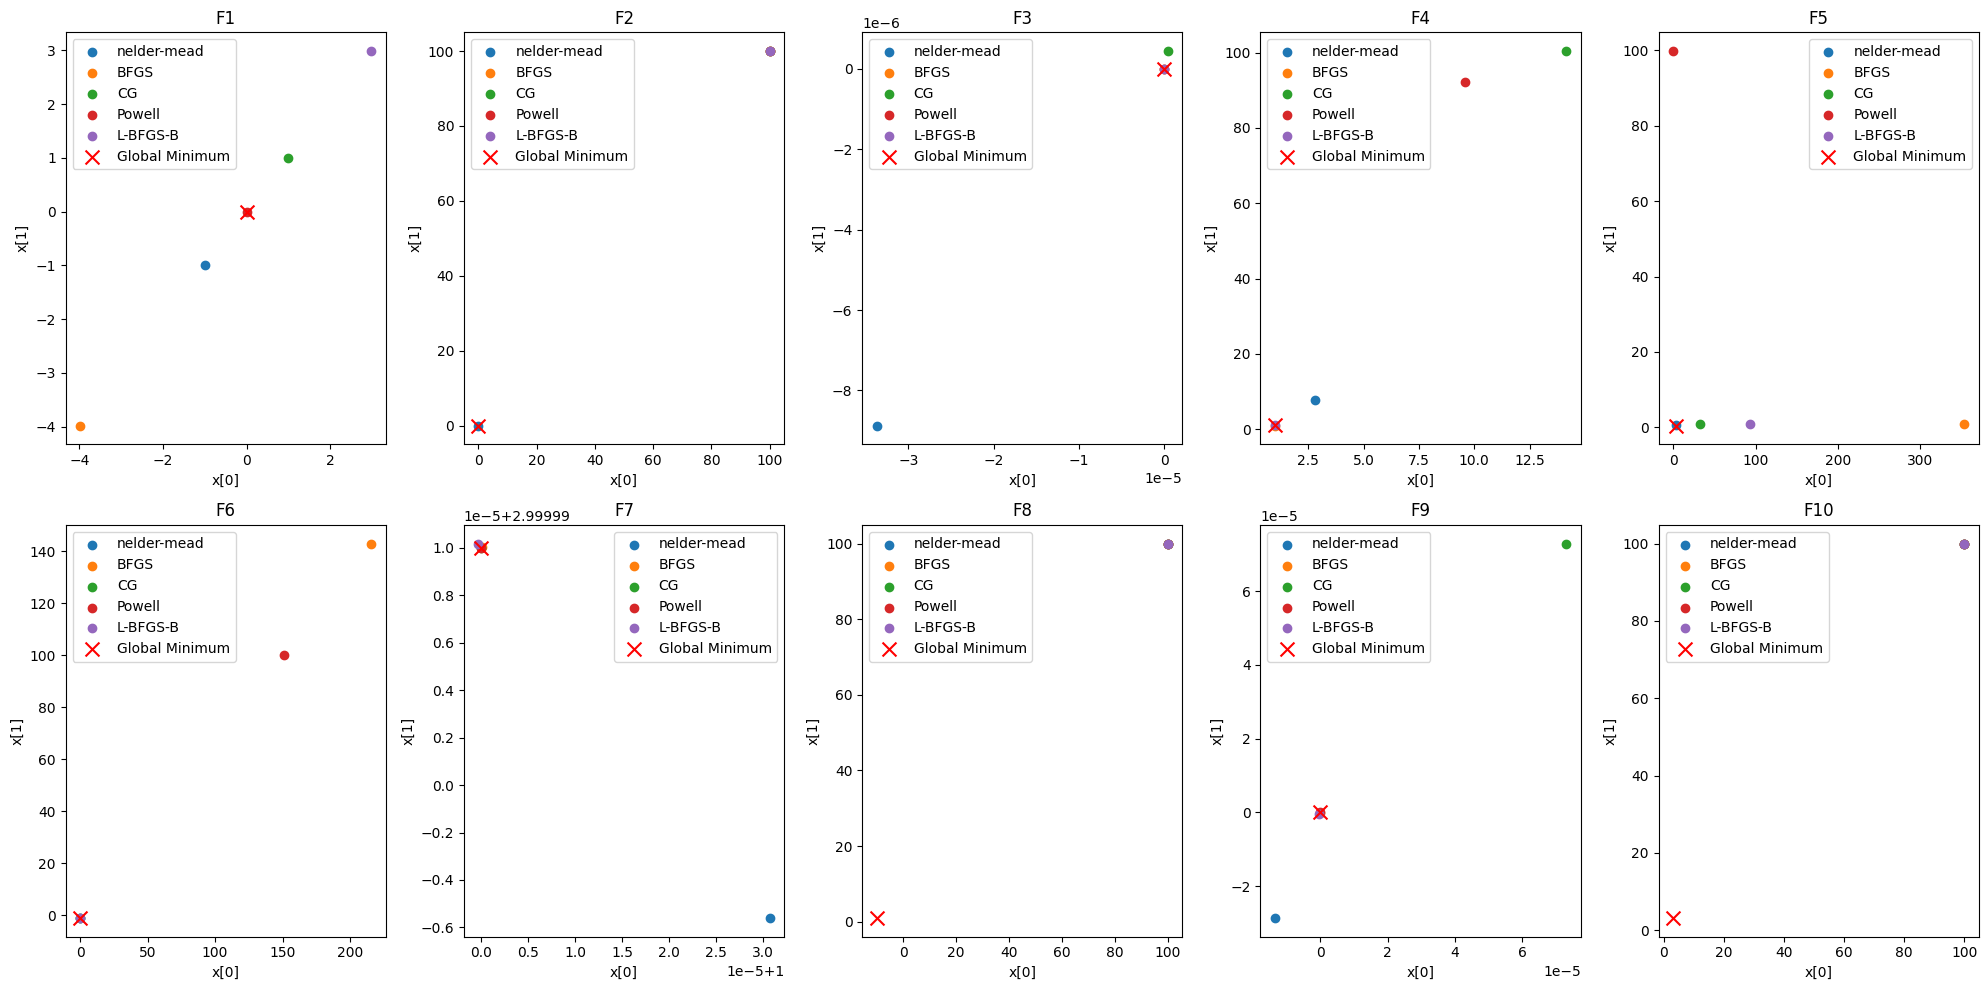

In [8]:

# Scatter Plot: Solutions Found vs Global Minimum
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

for i, func in enumerate(functions):
    x_star = np.array(global_minimum[func]['x'])
    
    for method in methods:
        x_found = np.array(results[method][func]['x'])
        axs[i//5, i%5].scatter(x_found[0], x_found[1], label=method)
    
    axs[i//5, i%5].scatter(x_star[0], x_star[1], label='Global Minimum', color='red', marker='x', s=100)
    axs[i//5, i%5].set_title(f'{func}')
    axs[i//5, i%5].set_xlabel('x[0]')
    axs[i//5, i%5].set_ylabel('x[1]')
    axs[i//5, i%5].legend()

plt.tight_layout()
plt.show()

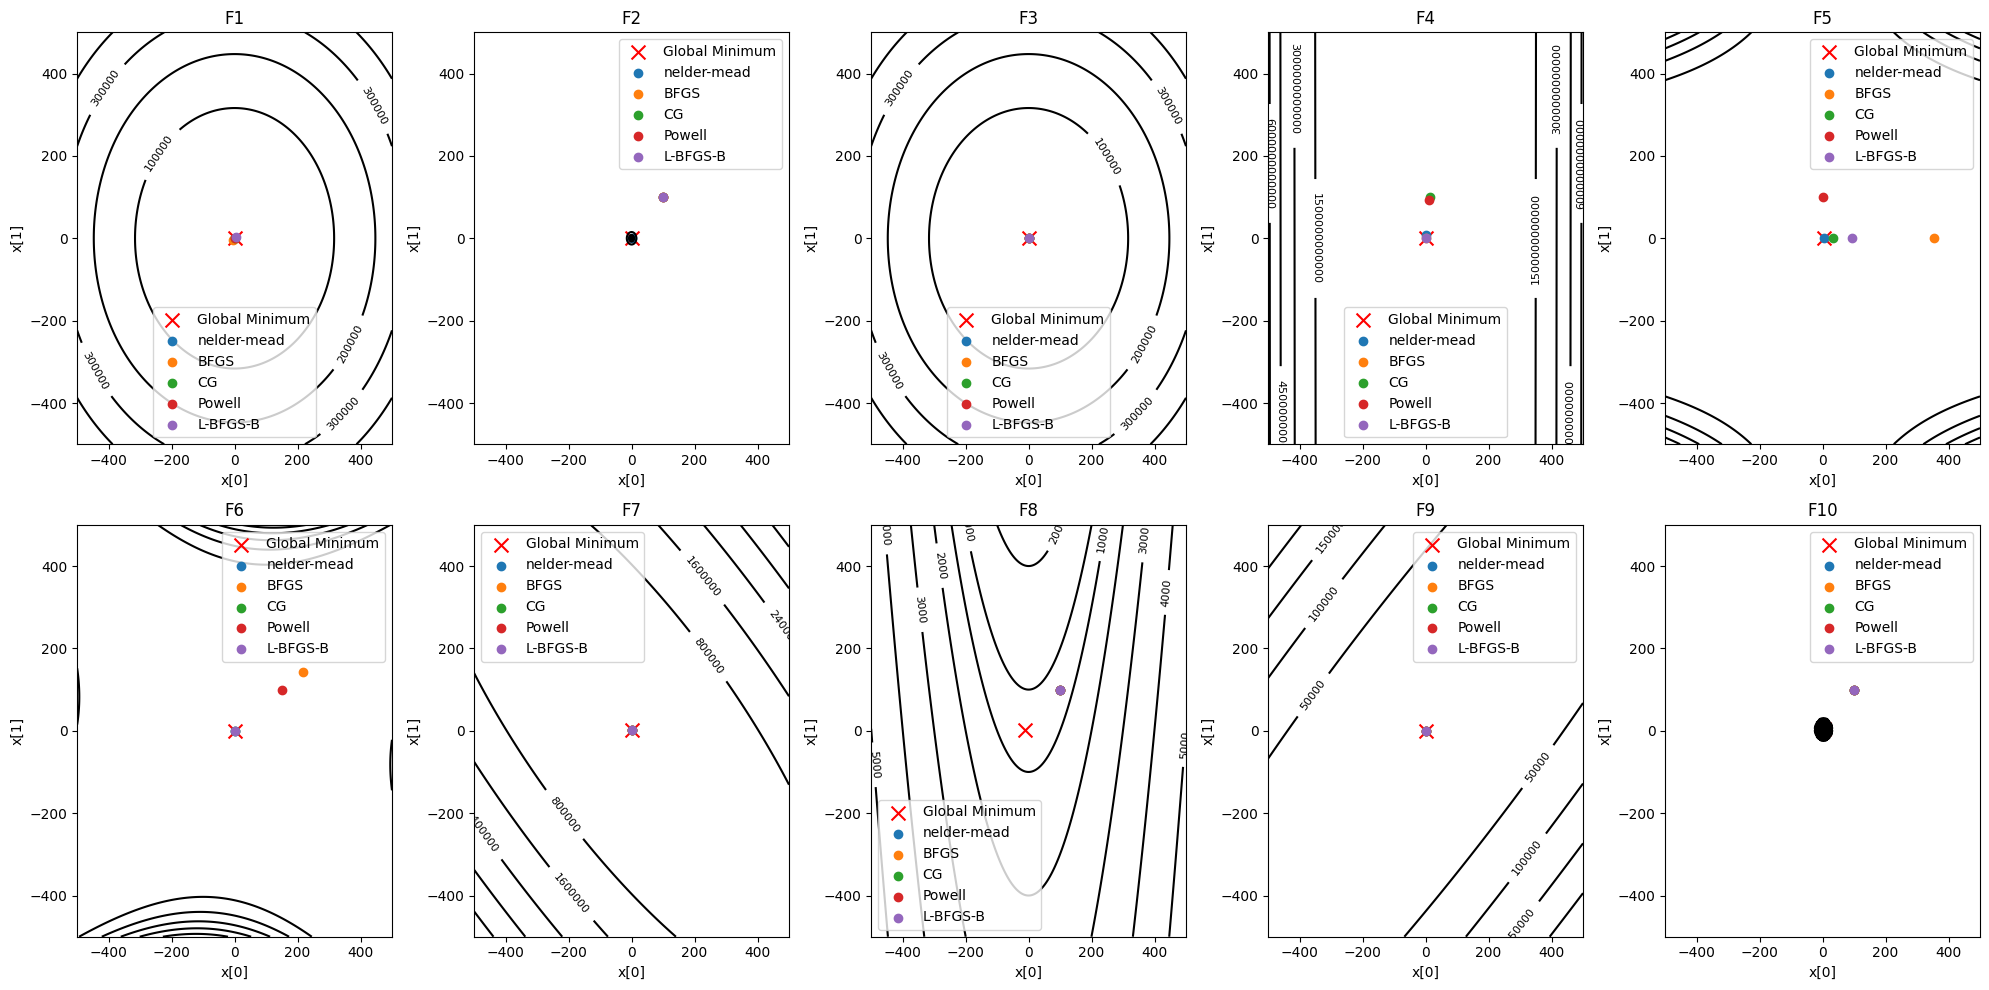

In [9]:

# Wrapper functions for contour plotting
def contour_wrapper(f):
    def wrapped(X, Y):
        return f((X, Y))
    return wrapped

# Wrap the original functions
functions = [contour_wrapper(F1), contour_wrapper(F2), contour_wrapper(F3), contour_wrapper(F4),
             contour_wrapper(F5), contour_wrapper(F6), contour_wrapper(F7), contour_wrapper(F8),
             contour_wrapper(F9), contour_wrapper(F10)]

function_names = [f'F{i}' for i in range(1, 11)]

# Define the range and resolution for the contour plots
x_range = np.linspace(-500, 500, 1000)
y_range = np.linspace(-500, 500, 1000)
X, Y = np.meshgrid(x_range, y_range)

# Scatter Plot: Solutions Found vs Global Minimum with Contours
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

for i, func in enumerate(functions):
    # Compute the function values for the contour plot
    Z = func(X, Y)
    
    # Create the contour plot
    ax = axs[i//5, i%5]
    contour = ax.contour(X, Y, Z, levels=5, colors='black')
    ax.clabel(contour, inline=True, fontsize=8)
    
    # Scatter the global minimum
    x_star = np.array(global_minimum[function_names[i]]['x'])
    ax.scatter(x_star[0], x_star[1], color='red', marker='x', s=100, label='Global Minimum')
    
    # Scatter the solutions found by each method
    for method in methods:
        x_found = np.array(results[method][function_names[i]]['x'])
        ax.scatter(x_found[0], x_found[1], label=method)
    
    ax.set_title(function_names[i])
    ax.set_xlabel('x[0]')
    ax.set_ylabel('x[1]')
    ax.legend()

plt.tight_layout()
plt.show()